# Part 0: Dependencies

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#  Part 1: Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

630

# Part 2: Perform API Calls

In [7]:
url = "http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID="
target_url = url + weather_api_key
target_url

'http://api.openweathermap.org/data/2.5/forecast?id=524901&APPID=a9b076ab19a3c1feec550a7162072f6d'

In [8]:
# set up lists to hold reponse info
cityname = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []
count = 0
    
# Loop through the list of cities and request the data

for city in cities:
    weather_response = requests.get(target_url + "&q=" + city + "&units=Imperial")
    weather_json = weather_response.json()
    try:
        cityname.append(weather_json['city']['name'])
        cloudiness.append(weather_json['list'][0]['clouds']['all'])
        country.append(weather_json['city']['country'])
        date.append(weather_json['list'][0]['dt'])
        humidity.append(weather_json['list'][0]['main']['humidity'])
        lat.append(weather_json['city']['coord']['lat'])
        lng.append(weather_json['city']['coord']['lon'])
        max_temp.append(weather_json['list'][0]['main']['temp_max'])
        wind_speed.append(weather_json['list'][0]['wind']['speed'])
        count = count + 1
        print(f"Processing record {count} of Set 1 | {city}")
    except:
        print("Record not found") 
        pass
        
print("Yikes!")

Processing record 1 of Set 1 | torbay
Processing record 2 of Set 1 | punta arenas
Processing record 3 of Set 1 | cherskiy
Processing record 4 of Set 1 | marzuq
Processing record 5 of Set 1 | maymyo
Processing record 6 of Set 1 | san cristobal
Processing record 7 of Set 1 | mataura
Processing record 8 of Set 1 | kapaa
Processing record 9 of Set 1 | new norfolk
Processing record 10 of Set 1 | nanortalik
Processing record 11 of Set 1 | georgetown
Processing record 12 of Set 1 | sao filipe
Processing record 13 of Set 1 | saint-philippe
Processing record 14 of Set 1 | lich
Processing record 15 of Set 1 | ushuaia
Processing record 16 of Set 1 | gohad
Record not found
Processing record 17 of Set 1 | gagesti
Processing record 18 of Set 1 | skjervoy
Processing record 19 of Set 1 | qaanaaq
Processing record 20 of Set 1 | petauke
Processing record 21 of Set 1 | saint-francois
Processing record 22 of Set 1 | obo
Record not found
Processing record 23 of Set 1 | rawson
Processing record 24 of Set 1 

Processing record 189 of Set 1 | san patricio
Processing record 190 of Set 1 | sitarganj
Processing record 191 of Set 1 | herat
Processing record 192 of Set 1 | lompoc
Processing record 193 of Set 1 | praia da vitoria
Processing record 194 of Set 1 | salalah
Processing record 195 of Set 1 | wawa
Processing record 196 of Set 1 | muzhi
Processing record 197 of Set 1 | iqaluit
Processing record 198 of Set 1 | santiago de cuba
Processing record 199 of Set 1 | labuhan
Processing record 200 of Set 1 | buala
Processing record 201 of Set 1 | sao joao da barra
Record not found
Record not found
Processing record 202 of Set 1 | atyrau
Processing record 203 of Set 1 | kochubey
Processing record 204 of Set 1 | kruisfontein
Processing record 205 of Set 1 | broome
Processing record 206 of Set 1 | acapulco
Processing record 207 of Set 1 | sharan
Processing record 208 of Set 1 | guanica
Processing record 209 of Set 1 | ilulissat
Processing record 210 of Set 1 | paamiut
Processing record 211 of Set 1 | 

Processing record 380 of Set 1 | barstow
Processing record 381 of Set 1 | melbu
Processing record 382 of Set 1 | tilichiki
Processing record 383 of Set 1 | slave lake
Processing record 384 of Set 1 | ellensburg
Processing record 385 of Set 1 | makakilo city
Record not found
Processing record 386 of Set 1 | inhambane
Record not found
Processing record 387 of Set 1 | mao
Processing record 388 of Set 1 | nakskov
Processing record 389 of Set 1 | lorengau
Processing record 390 of Set 1 | plavsk
Processing record 391 of Set 1 | buluang
Processing record 392 of Set 1 | sao jose da coroa grande
Processing record 393 of Set 1 | taltal
Processing record 394 of Set 1 | juegang
Processing record 395 of Set 1 | kshenskiy
Processing record 396 of Set 1 | sipe sipe
Processing record 397 of Set 1 | kanigoro
Processing record 398 of Set 1 | brae
Processing record 399 of Set 1 | toba tek singh
Processing record 400 of Set 1 | molagavita
Processing record 401 of Set 1 | shenjiamen
Processing record 402 o

Processing record 572 of Set 1 | guasdualito
Processing record 573 of Set 1 | taunton
Processing record 574 of Set 1 | voznesenye
Processing record 575 of Set 1 | portalegre
Processing record 576 of Set 1 | batemans bay
Processing record 577 of Set 1 | kaduy
Processing record 578 of Set 1 | kill
Processing record 579 of Set 1 | port lincoln
Processing record 580 of Set 1 | odweyne
Processing record 581 of Set 1 | saint-denis
Processing record 582 of Set 1 | kavaratti
Processing record 583 of Set 1 | beaufort
Processing record 584 of Set 1 | yanam
Processing record 585 of Set 1 | chimbote
Processing record 586 of Set 1 | darasun
Processing record 587 of Set 1 | iacu
Processing record 588 of Set 1 | daru
Record not found
Yikes!


# Part 3: Convert Raw Data to DataFrame

In [9]:
# Convert array of JSONs into Pandas DataFrame

myWeather_dict = {"City": cityname,"Latitude": lat, "Longitude":lng,
                "Max Temp":max_temp,"Humidity":humidity,"Cloudiness":cloudiness,
                "Wind Speed":wind_speed,"Country":country, "Date":date}
myWeather_df = pd.DataFrame(myWeather_dict)
myWeather_df

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Torbay,47.6666,-52.7314,24.64,88,93,17.20,CA,1613638800
1,Punta Arenas,-53.1500,-70.9167,43.86,77,79,6.46,CL,1613638800
2,Cherskiy,68.7500,161.3000,-28.05,98,3,0.58,RU,1613638800
3,Marzuq,14.4000,46.4667,86.85,13,0,3.36,YE,1613638800
4,Pyn U Lwin,22.0333,96.4667,87.73,24,18,8.59,MM,1613638800
...,...,...,...,...,...,...,...,...,...
583,Yanam,16.7333,82.2167,85.51,50,10,8.81,IN,1613638800
584,Chimbote,-9.0853,-78.5783,69.94,82,18,3.09,PE,1613638800
585,Darasun,51.6667,114.0000,28.17,69,69,7.16,RU,1613638800
586,Iaçu,-12.7672,-40.2117,72.00,96,100,1.57,BR,1613638800


In [10]:
# Export the City_Data into a csv
myWeather_df.to_csv(r'output_data\cities.csv')

## Inspect the data and remove the cities where the humidity > 100%.

In [11]:
# What's the highest humidity in my dataframe? If not greater than 100, then skip step.
print(myWeather_df["Humidity"].max())


100


# Part 4: Scatter Plots

## Latitude vs. Temperature Plot

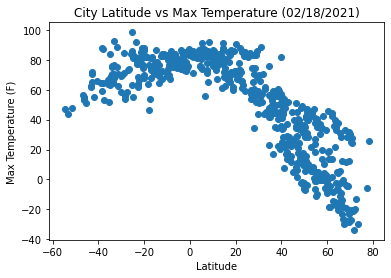

In [12]:
# Generating a scatter plot for of latitude vs temperature ...
lat = myWeather_df["Latitude"]
temp = myWeather_df["Max Temp"]

plt.scatter(lat,temp)
plt.title('City Latitude vs Max Temperature (02/18/2021)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.savefig('output_data/LATvsMAXTEMP-SCATTERPLOT')
plt.show()


## Latitude vs. Humidity Plot

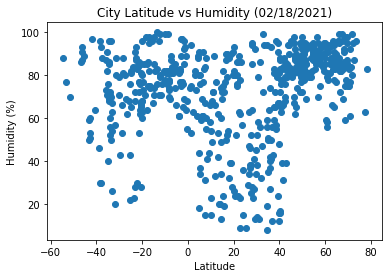

In [13]:
# Generating a scatter plot for of latitude vs humidity ...
lat = myWeather_df["Latitude"]
hum = myWeather_df["Humidity"]

plt.scatter(lat,hum)
plt.title('City Latitude vs Humidity (02/18/2021)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('output_data/LATvsHUMIDITY-SCATTERPLOT')
plt.show()


## Latitude vs. Cloudiness Plot

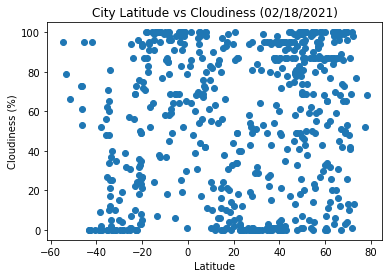

In [14]:
# Generating a scatter plot for of latitude vs cloudiness ...
lat = myWeather_df["Latitude"]
clo = myWeather_df["Cloudiness"]

plt.scatter(lat,clo)
plt.title('City Latitude vs Cloudiness (02/18/2021)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('output_data/LATvsCLOUDINESS-SCATTERPLOT')
plt.show()


## Latitude vs. Wind Speed Plot

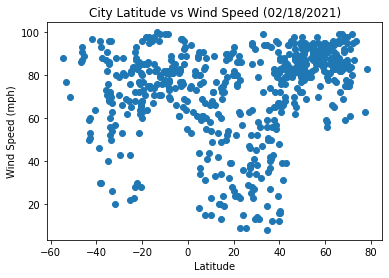

In [16]:
# Generating a scatter plot for of latitude vs wind speed ...
lat = myWeather_df["Latitude"]
wsp = myWeather_df["Wind Speed"]

plt.scatter(lat,hum)
plt.title('City Latitude vs Wind Speed (02/18/2021)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.savefig('output_data/LATvsWINDSPEED-SCATTERPLOT')
plt.show()


# Part 5: Linear Regression

In [52]:
# Create a dataframe for each hemisphere
nohem_df = myWeather_df.loc[myWeather_df["Latitude"] >= 0,:]
sohem_df = myWeather_df.loc[myWeather_df["Latitude"] < 0,:]

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

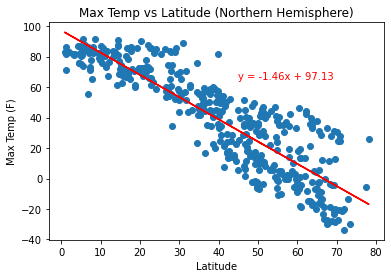

The r-squared is: -0.8739298042992508. This means that temperature is strongly but negatively correlated with latitude i.e. the higher the latitude, the lower the temerature.


In [79]:
x_values = nohem_df["Latitude"]
y_values = nohem_df["Max Temp"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Max Temp vs Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(45,65), fontsize=10, color="red")

plt.savefig('output_data/LATvsMAXTEMP - Northern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that temperature is strongly but negatively correlated with latitude i.e. the higher the latitude, the lower the temperature.")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

0.5503299058031341


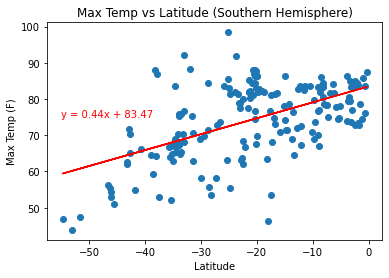

The r-squared is: 0.5503299058031341. This means that temperature is weakly but positively correlated with latitude i.e. the higher the latitude, the higher the temperature.


In [91]:
x_values = sohem_df["Latitude"]
y_values = sohem_df["Max Temp"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(r_value)

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Max Temp vs Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.annotate(line_eq,(-55,75), fontsize=10, color="red")

plt.savefig('output_data/LATvsMAXTEMP - Southern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that temperature is weakly but positively correlated with latitude i.e. the higher the latitude, the higher the temperature.")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

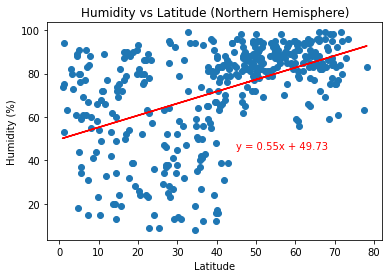

The r-squared is: 0.47729767257652667. This means that humidity is weakly but positively correlated with latitude i.e. the higher the latitude, the higher the temerature.


In [90]:
x_values = nohem_df["Latitude"]
y_values = nohem_df["Humidity"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Humidity vs Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(45,45), fontsize=10, color="red")

plt.savefig('output_data/LATvsHUMIDITY - Northern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that humidity is weakly but positively correlated with latitude i.e. the higher the latitude, the higher the humidity.")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

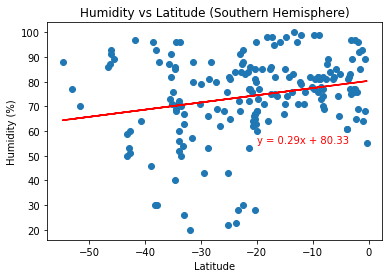

The r-squared is: 0.2273317330714179. This means that humidity is very weakly but positively correlated with latitude i.e. the higher the latitude, the lower the humidity.


In [92]:
x_values = sohem_df["Latitude"]
y_values = sohem_df["Humidity"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Humidity vs Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.annotate(line_eq,(-20,55), fontsize=10, color="red")

plt.savefig('output_data/LATvsHUMIDITY - Southern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that humidity is very weakly but positively correlated with latitude i.e. the higher the latitude, the higher the humidity.")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

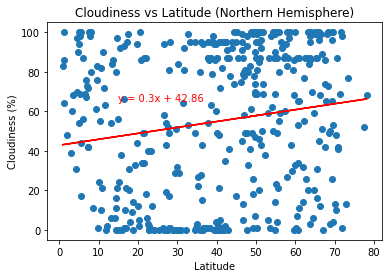

The r-squared is: 0.16210206879861966. This means that cloudiness is very weakly but positively correlated with latitude i.e. the higher the latitude, the higher the cloudiness.


In [93]:
x_values = nohem_df["Latitude"]
y_values = nohem_df["Cloudiness"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Cloudiness vs Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(15,65), fontsize=10, color="red")

plt.savefig('output_data/LATvsCLOUDINESS - Northern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that cloudiness is very weakly but positively correlated with latitude i.e. the higher the latitude, the higher the cloudiness.")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

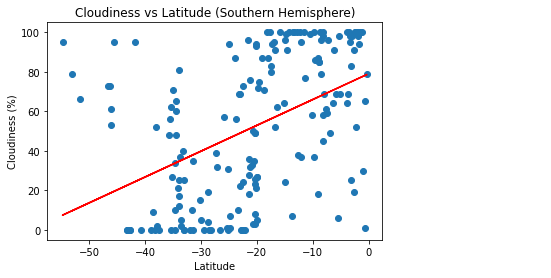

The r-squared is: 0.46232024202671146. This means that cloudiness is weakly but positively correlated with latitude i.e. the higher the latitude, the higher the cloudiness.


In [99]:
x_values = sohem_df["Latitude"]
y_values = sohem_df["Cloudiness"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Cloudiness vs Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.annotate(line_eq,(15,65), fontsize=10, color="red")

plt.savefig('output_data/LATvsCLOUDINESS - Southern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that cloudiness is weakly but positively correlated with latitude i.e. the higher the latitude, the higher the cloudiness.")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

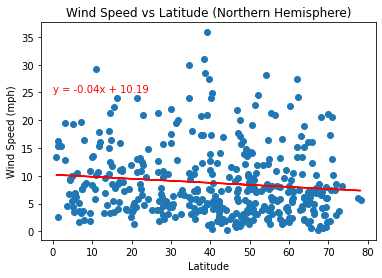

The r-squared is: -0.11373035330737338. This means that wind speed is weakly but negatively correlated with latitude i.e. the higher the latitude, the lower the wind speed.


In [94]:
x_values = nohem_df["Latitude"]
y_values = nohem_df["Wind Speed"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Wind Speed vs Latitude (Northern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(0,25), fontsize=10, color="red")

plt.savefig('output_data/LATvsWINDSPEED - Northern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that wind speed is weakly but negatively correlated with latitude i.e. the higher the latitude, the lower the wind speed.")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

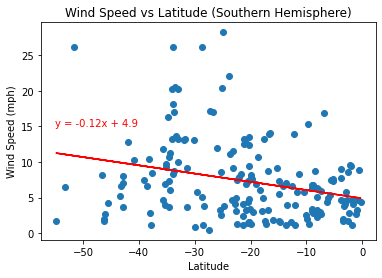

The r-squared is: -0.2756036433990722. This means that wind speed is weakly but negatively correlated with latitude i.e. the higher the latitude, the lower the wind speed.


In [97]:
x_values = sohem_df["Latitude"]
y_values = sohem_df["Wind Speed"]
#plot_linear_regression(x_values,y_values,'Max Temp',(6,30))

# Linear Regression
slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)

# Line equation for annotating
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Generating the regression plot
plt.scatter(x_values, y_values)
plt.plot(x_values,slope * x_values + intercept, "r-")

plt.title('Wind Speed vs Latitude (Southern Hemisphere)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.annotate(line_eq,(-55,15), fontsize=10, color="red")

plt.savefig('output_data/LATvsWINDSPEED - Southern Hemisphere Linear Regression')
plt.show()
print("The r-squared is: " + str(r_value) + ". This means that wind speed is weakly but negatively correlated with latitude i.e. the higher the latitude, the lower the wind speed.")